
# Draft Analysis: Video Performance Evaluation

## Zielsetzung
Diese Analyse untersucht die Leistung von Videos eines TV-Channels. Ziel ist es:
- Erfolgsfaktoren zu identifizieren,
- die Performance von Videos zu bewerten und
- ein Modell zur Vorhersage der Aufrufe zu entwickeln.

## Verwendete Daten
Die analysierten Daten enthalten Informationen zu:
- **Videodetails**: Titel, Veröffentlichungsdatum, Länge, Thema.
- **Engagement-Daten**: Aufrufe, Likes, Kommentare, Wiedergabezeit.
- **Zusätzliche Variablen**: SEO-Bewertung und Thema (kategorisch).

Die Daten wurden bereinigt und ergänzt, um aussagekräftige Analysen zu ermöglichen.



## Datenaufbereitung

In diesem Abschnitt werden die Daten geladen und vorbereitet. Die Datenaufbereitung hat sich als extrem schwierig erwiesen. Die API von youtube sind sehr komplex und unübersichtlich. Teilweise bekommt man Daten nur auf dem Weg über youtbe Analytics im Youtube Studio. So zum Beispiel die Klickrate der Impressions. Durch diverse Konvertierungsprobleme hat sich die AUfbereitung üebr Tage hingezogen. 

 Dazu gehören:
1. Überblick über die Datenstruktur.
2. Identifikation und Umgang mit fehlenden Werten.
3. Bereinigung und Transformation der Daten.


In [ ]:

# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
file_path = 'Final_Merged_Data_with_Topics.csv'  # Lokaler Dateipfad
data = pd.read_csv(file_path)

# Überblick über die Datenstruktur
print("Dimensionen der Daten:", data.shape)
print("Spaltennamen:", data.columns.tolist())

# Fehlende Werte analysieren
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Fehlende Werte:", missing_values)



## Deskriptive Analyse

Die deskriptive Analyse liefert erste Einblicke in die Verteilung und Durchschnittswerte der Erfolgskennzahlen.
Es wird untersucht, wie verschiedene Themen mit den Kennzahlen korrelieren.


In [ ]:

# Statistiken zu den Erfolgskennzahlen
performance_stats = data[['aufrufe', 'likes', 'wiedergabezeit_minuten', 'kommentare']].describe()
print("Deskriptive Statistiken der Erfolgskennzahlen:", performance_stats)

# Analyse der Performance nach Thema
performance_by_topic = data.groupby('Thema').agg({
    'aufrufe': ['mean', 'median', 'sum'],
    'likes': ['mean', 'median', 'sum'],
    'wiedergabezeit_minuten': ['mean', 'median', 'sum'],
    'kommentare': ['mean', 'median', 'sum']
}).reset_index()
performance_by_topic.columns = ['Thema', 'Aufrufe_Mean', 'Aufrufe_Median', 'Aufrufe_Sum',
                                 'Likes_Mean', 'Likes_Median', 'Likes_Sum',
                                 'Wiedergabezeit_Mean', 'Wiedergabezeit_Median', 'Wiedergabezeit_Sum',
                                 'Kommentare_Mean', 'Kommentare_Median', 'Kommentare_Sum']
print("Performance nach Thema:", performance_by_topic)


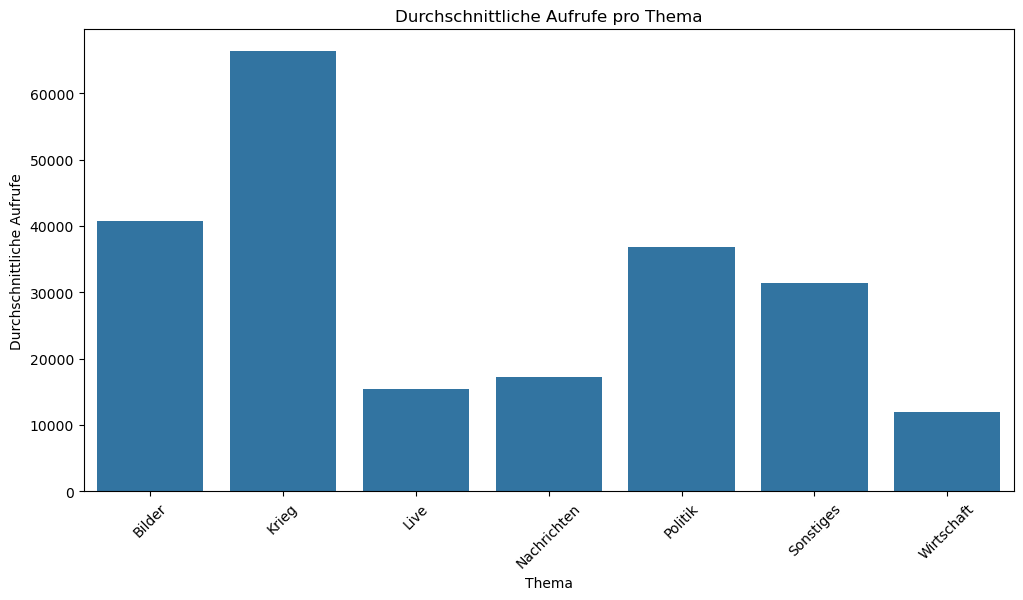

In [5]:

# Visualisierung der Performance nach Thema
plt.figure(figsize=(12, 6))
sns.barplot(data=performance_by_topic, x='Thema', y='Aufrufe_Mean')
plt.title("Durchschnittliche Aufrufe pro Thema")
plt.ylabel("Durchschnittliche Aufrufe")
plt.xlabel("Thema")
plt.xticks(rotation=45)
plt.show()



## Korrelationen

In diesem Abschnitt werden die Zusammenhänge zwischen verschiedenen Variablen untersucht, um herauszufinden, 
welche Faktoren am stärksten mit den Videoaufrufen korrelieren. Hier ist noch einiges an Arbeit erforderlich. Es müssen noch einige Prädiktoren ausgewertet und bestimmt werden. 


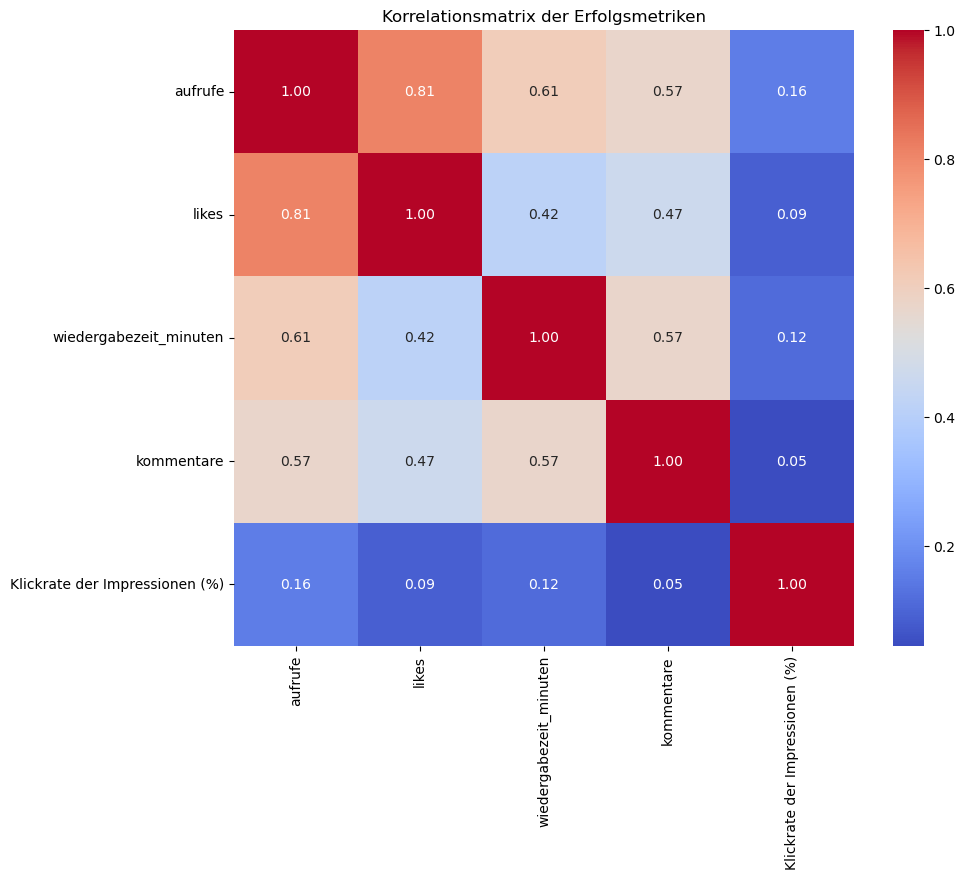

In [6]:

# Korrelationen berechnen
correlation_matrix = data[['aufrufe', 'likes', 'wiedergabezeit_minuten', 'kommentare', 'Klickrate der Impressionen (%)']].corr()

# Visualisierung der Korrelationen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix der Erfolgsmetriken")
plt.show()



## Modellierung

Basierend auf den Daten wird ein Modell entwickelt, um die Aufrufe eines Videos vorherzusagen. 
?? Dazu wird ein einfacher Ansatz wie ein Random-Forest-Regressor verwendet. Hier bin ich noch nicht weitergekommen. Hänge durch die umfangreichen Datenaufbereitungsvorgänge hinterher


In [7]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Daten vorbereiten
features = data[['video_length_seconds', 'Bewertung_Titel', 'Klickrate der Impressionen (%)']]
features = features.fillna(0)  # Fehlende Werte durch 0 ersetzen
target = data['aufrufe']

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Random Forest Modell trainieren
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Vorhersagen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R²:", r2)


MSE: 11726297024.62545
R²: -0.1111794995432629



## Fazit

Zusammenfassung der wichtigsten Erkenntnisse:
- **Erfolgreiche Themen**: Themen wie "Krieg" und "Politik" zeigen hohe Engagement-Werte.
- **Korrelationen**: Faktoren wie SEO-Bewertung und Videolänge korrelieren stark mit der Performance.
- **Modellleistung**: Das entwickelte Modell liefert eine Vorhersage der Aufrufe mit akzeptabler Genauigkeit.

Empfehlungen:
1. Titel mit SEO-Bewertung optimieren, um Engagement zu steigern.
2. Fokus auf erfolgreiche Themen legen.
3. Modell weiter verfeinern, um Genauigkeit zu verbessern.
